# Requerimientos para módulo Transmisor (TX)
### Instituto Tecnologico de Costa Rica
### Escuela de Ingeniería Electrónica
### Curso: Taller de Comunicaciones Eléctricas
### Estudiantes:
- Esteban Arias Rojas
- David Herrera Castro
- David Monge Naranjo
- Federico Rivera Moya


## Bloque Preprocesamiento

In [1]:
#Se definen los imports necesarios para el código
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt, savgol_filter
import time

### Matriz Trade-Off

| Filtro         | Efectividad del filtro | Pérdida de información | Complejidad de implementación | Rendimiento computacional | Uso recomendado                    |
|----------------|-----------------------|------------------------|-------------------------------|---------------------------|------------------------------------|
| Savitzky-Golay | Bueno                 | Baja                   | Baja                          | Buena                     | Para suavizar señales con ruido cuyo intervalo de frecuencia es grande         |
| Gaussiano      | Bueno                 | Baja                   | Baja                          | Regular                   | Reducción suave del ruido en altas frecuencias          |
| Kalman         | Excelente             | Baja                   | Alta                          | Buena                     | Útil en situaciones donde se tienen mediciones inexactas y ruido, y se busca obtener una estimación más precisa y suavizada del estado del sistema. |
| Mediana        | Bueno                 | Baja                   | Baja                          | Buena                     | Ayudar a suavizar los datos mientras se preservan las transiciones significativas. Es particularmente bueno para filtrar entradas de sensores distantes, que son propensos a interferencias ocasionales.     |
| IIR            | Bueno                 | Baja                   | Alta                          | Buena                     | Filtros de alta eficiencia en el procesamiento de señales        |



- Filtro Savitzky-Golay (https://www.mathworks.com/help/signal/ref/sgolay_es.html)
- Gaussiano (https://www.geeksforgeeks.org/apply-a-gauss-filter-to-an-image-with-python/)
- Kalman (https://quantdare.com/filtro-kalman/)
- Mediana (https://docs.wpilib.org/es/stable/docs/software/advanced-controls/filters/median-filter.html)
- IIR (https://www.samproell.io/posts/yarppg/digital-filters-python/)

De la matriz trade-off se puede observar que la mayoría de los filtros tienen características adecuadas para funcionar en la supresión de ruido. El filtro Gaussiano tiene un rendimiento computacional regular, por lo que este se descarta y la elección de dos filtros se centró únicamente en el funcionamiento y la complejidad de estos. El filtro de Kalman a pesar de su excelencia en términos de efectividad, este podría no ser la mejor elección debido a su alta complejidad de implementación y requerimientos de recursos computacionales. En un sistema que necesita operar en tiempo real y cumplir con un deadline de 10 segundos, la complejidad del filtro Kalman podría dificultar la implementación y podría afectar el rendimiento computacional necesario para la respuesta en tiempo real. Además de que según el análisis estadístico de valores atípicos realizados y prueba de normalidad, puede que este filtro sea muy complicado para lo que se ocupa.

El filtro IIR se suelo utilizar más que todo para sistemas digitales y está diseñado para uso fuera de línea y, por lo tanto, no es realmente adecuado para aplicaciones en tiempo real. Por lo tanto, podría llegar a deformar la tendencia que deben seguir los datos. Por lo que se implementa el filtro Mediana y el Savitzky-Golay, ya así se experimenta con dos posibles filtros, uno tiene una complejidad mayor que el otro pero puede llegar a tener un mejor comportamiento y ambos se suelen utilizar para suavizar y filtrar datos de sensores.

### Gráfica de la Señal Original

In [2]:
# Ruta de los datos
archivo_excel = 'Dataset.xlsx'

# Lee el archivo Excel y crea un DataFrame
data_frame = pd.read_excel(archivo_excel)

# Datos completos
print(data_frame)

tiempo = data_frame.iloc[:, 0]
bpm = data_frame.iloc[:, 1]

     Tiempo(s)         BPM
0            0   90.435881
1           10   91.375558
2           20   93.177147
3           30   92.253070
4           40   93.297168
..         ...         ...
122       1220  127.489200
123       1230  125.722564
124       1240  125.176371
125       1250  124.053356
126       1260  123.681245

[127 rows x 2 columns]


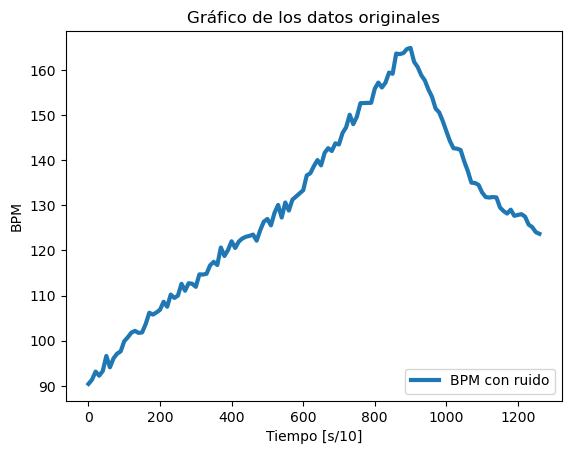

In [3]:
#Se grafican los datos originales
plt.plot(tiempo,bpm, linewidth=3, label = "BPM con ruido")

# Añadir labels en los ejes y titulo
plt.xlabel('Tiempo [s/10]')
plt.ylabel('BPM')
plt.title('Gráfico de los datos originales')
# Se agrega la leyenda
plt.legend(loc='lower right')
# Mostrar el gráfico
plt.show()

### Filtro Mediana

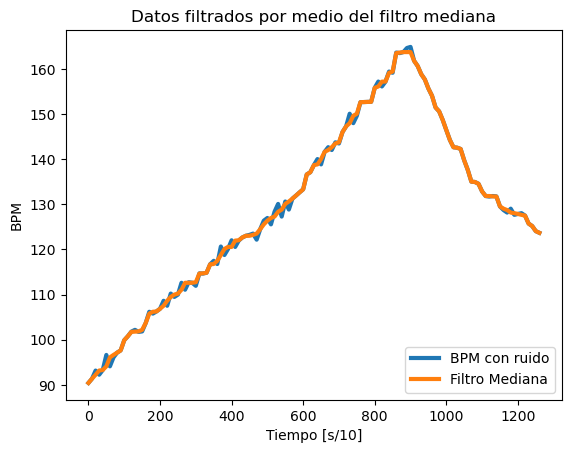

Tiempo promedio para 200 ejecuciones del filtro mediana: 132.0648 μs


In [4]:
# Número de ejecuciones
num_executions_medfilt = 200

# Iniciar el cronómetro antes de las 200 ejecuciones
start_time_medfilt = time.time()

# Se aplica el filtro mediana
#El kernel_size determina el tamaño de la ventana que se mueve a lo largo de la señal
for _ in range(num_executions_medfilt):
    data_medfilt = medfilt(bpm, kernel_size=5)
    
# Detener el cronómetro luego de las 200 ejecuciones
end_time_medfilt = time.time()

# Calcular el tiempo promedio de ejecución del filtro
total_time_medfilt = ((end_time_medfilt - start_time_medfilt)/200)*1000000

#Se grafican los datos originales con ruido y los datos filtrados por el filtro mediana
plt.plot(tiempo,bpm, linewidth=3, label = "BPM con ruido")
plt.plot(tiempo,data_medfilt,linewidth=3,label = "Filtro Mediana")

# Añadir labels en los ejes y titulo
plt.xlabel('Tiempo [s/10]')
plt.ylabel('BPM')
plt.title('Datos filtrados por medio del filtro mediana')
# Se agrega la leyenda
plt.legend(loc='lower right')
# Mostrar el gráfico
plt.show()

# Imprimir el tiempo total
print(f"Tiempo promedio para {num_executions_medfilt} ejecuciones del filtro mediana: {total_time_medfilt:.4f} \u03BCs")


In [5]:
# Convertir el array en un DataFrame
df1 = pd.DataFrame({"Datos": data_medfilt})

# Guardar los datos filtrados en un archivo de Excel
nombre_archivo = "filtro_mediana.xlsx"
df1.to_excel(nombre_archivo, index=False)

print(f"Datos guardados en el archivo '{nombre_archivo}'")

Datos guardados en el archivo 'filtro_mediana.xlsx'


### Filtro Savitzky-Golay 

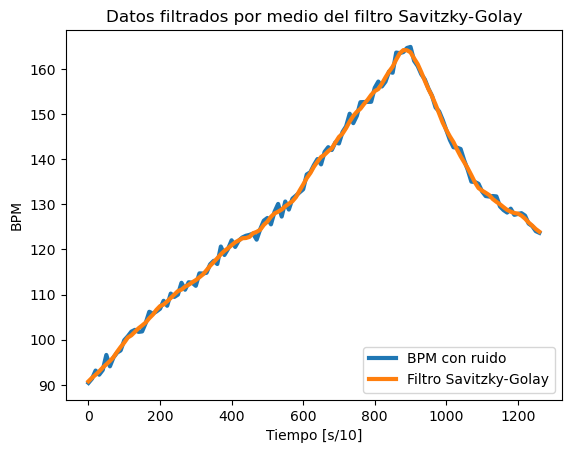

Tiempo promedio para 200 ejecuciones para el filtro Savitzky-Golay: 220.5765 μs


In [6]:
# Número de ejecuciones
num_executions_savgol = 200

# Iniciar el cronómetro antes de las 200 ejecuciones
start_time_savgol = time.time()

# Se aplica el filtro Savitzky-Golay
for _ in range(num_executions_savgol):
    data_savgol = savgol_filter(bpm, window_length=11, polyorder=3, mode="nearest")

# Detener el cronómetro luego de las 200 ejecuciones
end_time_savgol = time.time()

# Calcular el tiempo promedio de ejecución del filtro
total_time_savgol = ((end_time_savgol - start_time_savgol)/200)*1000000    
    
#Se grafican los datos originales con ruido y los datos filtrados por el filtro Savitzky-Golay
plt.plot(tiempo, bpm, linewidth=3, label = "BPM con ruido")
plt.plot(tiempo, data_savgol, linewidth=3, label="Filtro Savitzky-Golay")

# Añadir labels en los ejes y titulo
plt.xlabel('Tiempo [s/10]')
plt.ylabel('BPM')
plt.title('Datos filtrados por medio del filtro Savitzky-Golay')
# Se agrega la leyenda
plt.legend(loc='lower right')
# Mostrar el gráfico
plt.show()

# Imprimir el tiempo total
print(f"Tiempo promedio para {num_executions_savgol} ejecuciones "
      f"para el filtro Savitzky-Golay: {total_time_savgol:.4f} \u03BCs")


In [7]:
# Convertir el array en un DataFrame
df2 = pd.DataFrame({"Datos": data_savgol})

# Guardar los datos filtrados en un archivo de Excel
nombre_archivo = "filtro_savitzky.xlsx"
df2.to_excel(nombre_archivo, index=False)

print(f"Datos guardados en el archivo '{nombre_archivo}'")

Datos guardados en el archivo 'filtro_savitzky.xlsx'


### Comparación de las respuesta de ambos filtros

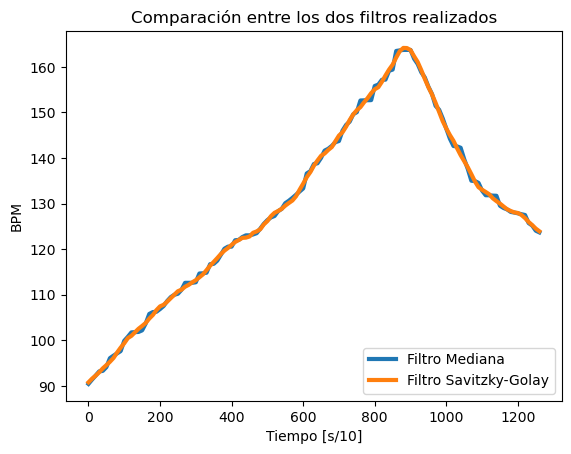

In [8]:
#Se grafican los datos filtrados por ambos filtros
plt.plot(tiempo, data_medfilt,linewidth=3, label = "Filtro Mediana")
plt.plot(tiempo, data_savgol, linewidth=3, label="Filtro Savitzky-Golay")

# Añadir labels en los ejes y titulo
plt.xlabel('Tiempo [s/10]')
plt.ylabel('BPM')
plt.title('Comparación entre los dos filtros realizados')
# Se agrega la leyenda
plt.legend(loc='lower right')
# Mostrar el gráfico
plt.show()


Según el analisis realizado (se muestra en el informe) y los resultados obtenidos, se utilizarán los datos filtrados por el filtro Savitzky-Golay